In [1]:
import numpy as np
import scipy
import networkx as nx
import pandas as pd
import sympy as sp

from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#symbols
lamda = sp.symbols('lamda')

#node xy coordinates
pos = {
    1 : [0,0],
    2 : [0.5,0],
    3 : [0.25,-.5],
    4 : [0.25,-1]
}

#plot parameters
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.xmargin'] = 0.2
plt.rcParams['axes.ymargin'] = 0.2


In [3]:
def get_vertex_adjacency_matrix(graph: "networkx.classes.graph.Graph"):
    vertex_adjacency_matrix=sp.zeros(4,4)

    for i, edge_i in enumerate(graph.edges):
        for j, edge_j in enumerate(graph.edges):
            if i != j:
                if edge_i[0] in edge_j or edge_i[1] in edge_j:
                    vertex_adjacency_matrix[i,j]=1
                
    return vertex_adjacency_matrix;

# 3.1

Unweighted graph G and its associated unweighted vertex-adjacency matrix

Matrix([
[0, 1, 1, 0],
[1, 0, 1, 1],
[1, 1, 0, 1],
[0, 1, 1, 0]])

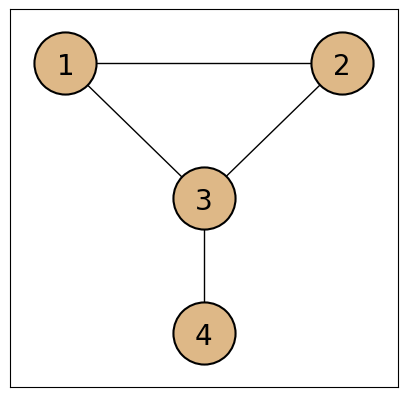

In [4]:
nodes = (1,2,3,4)
edges = ((1,2),(1,3),(2,3),(3,4))
G=nx.Graph()
for node in nodes: G.add_node(node)
for edge in edges: G.add_edge(*edge)


nx.draw_networkx_nodes(
    G,
    pos,
    node_size=2000,
    node_color="burlywood",
    linewidths=1.5,
    edgecolors="black",
)

nx.draw_networkx_labels(
    G, 
    pos,
    verticalalignment="center_baseline",
    font_size=20)

nx.draw_networkx_edges(G, pos)

get_vertex_adjacency_matrix(G)

# 3.2

Matrix([
[2, 1, 1, 0],
[1, 2, 1, 1],
[1, 1, 3, 1],
[0, 1, 1, 3]])

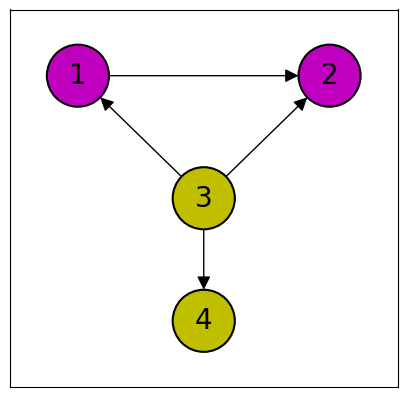

In [5]:
nodes = (1,2,3,4)
node_attribute_value = (2,2,3,3)
node_attribute_color = ("m", "m", "y", "y")
edges = ((1,2),(3,1),(3,2),(3,4))
D=nx.DiGraph()
for node in nodes: D.add_node(node)
for edge in edges: D.add_edge(*edge)


nodes=nx.draw_networkx_nodes(
    D, 
    pos,
    node_size=2000,
    node_color=node_attribute_color,
    linewidths=1.5,
    edgecolors="black"
)

labels=nx.draw_networkx_labels(
    D, 
    pos,
    font_size=20
)

nx.draw_networkx_edges(
    D, 
    pos,
    arrows=True,
    arrowsize=20,
    node_size=2000)

attribute_matrix=sp.diag(*node_attribute_value)
get_vertex_adjacency_matrix(D)+attribute_matrix

In [8]:
nodes = (0,1,2,3,4)
node_attribute = ('A','B','A','A','B','B')
edges = ((0,1),(0,4),(1,2),(1,4),(2,3),(3,4),(3,5))
edge_weights = (0.9,1.5,1.3,1.0,1.1,1.2,1.1)

#Graph
G=nx.Graph()
for node in nodes: G.add_node(node)
for edge in edges: G.add_edge(*edge)

#Node and Edge Attributes
for i in range(len(nodes)): G.add_node(nodes[i], type=node_attribute[i])
for i in range(len(edges)): G.add_edge(*edges[i], weight=edge_weights[i])

#Directed Graph
D=nx.DiGraph()
for node in nodes: D.add_node(node)
for edge in edges: D.add_edge(*edge)

#subGraph of "A" nodes
sub_nodes = list(node for node, data in G.nodes(data=True) if data.get("type") == "B")
sub_graph_A = G.subgraph(sub_nodes)

#MultiGraph
M=nx.MultiGraph()
for node in nodes: M.add_node(node)
for edge in edges: M.add_edge(*edge)
M.add_edge(0,1)


1

In [9]:
print('Graph \n nodes \t',  G.nodes(), '\n edges \t', G.edges(), '\n')
print('Graph Attributes \n nodes \t',  G.nodes(data=True), '\n edges \t', G.edges(data=True), '\n')
print('subGraph \n nodes \t',  sub_graph_A.nodes(), '\n edges \t', sub_graph_A.edges(), '\n')
print('MultiGraph \n nodes \t',  M.nodes(), '\n edges \t', M.edges(), '\n')


Graph 
 nodes 	 [0, 1, 2, 3, 4, 5] 
 edges 	 [(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4), (3, 5)] 

Graph Attributes 
 nodes 	 [(0, {'type': 'A'}), (1, {'type': 'B'}), (2, {'type': 'A'}), (3, {'type': 'A'}), (4, {'type': 'B'}), (5, {})] 
 edges 	 [(0, 1, {'weight': 0.9}), (0, 4, {'weight': 1.5}), (1, 2, {'weight': 1.3}), (1, 4, {'weight': 1.0}), (2, 3, {'weight': 1.1}), (3, 4, {'weight': 1.2}), (3, 5, {'weight': 1.1})] 

subGraph 
 nodes 	 [1, 4] 
 edges 	 [(1, 4)] 

MultiGraph 
 nodes 	 [0, 1, 2, 3, 4, 5] 
 edges 	 [(0, 1), (0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4), (3, 5)] 



# 3.3

- item making vertex-adjacency matrix
- item making the Laplacian (eqn. 3.3)
- item making edge-adjacency matrix 
- item making distance matrix
- item making incidence matrix

In [10]:
nodes = (0,1,2,3,4,5)
node_attribute = ('A','B','A','A','B','B')
edges = ((0,1),(0,4),(1,2),(1,4),(2,3),(3,4),(3,5))
edge_weights = (0.9,1.5,1.3,1.0,1.1,1.2,1.1)

#Graph
G=nx.Graph()
for node in nodes: G.add_node(node)
for edge in edges: G.add_edge(*edge)


In [ ]:
A=nx.adjacency_matrix(G)
L=nx.laplacian_matrix(G)
D=nx.floyd_warshall(G)
I=nx.incidence_matrix(G)


In [ ]:
A_display=sp.Matrix(A.todense())
L_display=sp.Matrix(L.todense())
D_display=sp.Matrix((pd.DataFrame(D)).astype(int))
I_display=sp.Matrix(I.todense().astype(int))

display(A_display, L_display, D_display, I_display)

# 3.4

- taking powers of A
- finding null matrix
- eigenvalue decomposition of A and L
- characteristic polynomial

In [ ]:
A2=A.todense()**2
A3=A.todense()**3
characteristic_polynomial=sp.Matrix(adjacency_matrix_df).charpoly(lamda)



# sp.Matrix(nx.adjacency_matrix(G).todense()).nullspace()

In [ ]:
A2_display=sp.Matrix(A2)
A3_display=sp.Matrix(A3)
characteristic_polynomial_display=sp.factor(p.as_expr())

display(A_display,A2_display,A3_display,characteristic_polynomial_display)


# 3.5 

- item Weiner index
- item centrality
- item graph diameter
- item PageRank

In [ ]:
WI=nx.wiener_index(G)
DC=nx.degree_centrality(G)
D=nx.diameter(G)
PR=nx.pagerank(G, alpha=0.85, max_iter=100)

display(DC)

In [ ]:
DC_display = pd.DataFrame(DC)

display(DC_display)